#  Module : Knowledge Discovery 1 & Text Mining  
##  Devoir Obligatoire – Projet de Sentiment Analysis

---

###  Sujet : Entraînement et évaluation d’un modèle de prédiction de sentiment à partir d’un dataset Kaggle


###  Étudiant : DECHRAOUI Mohammed 
###  Filière : M2SI
###  Année Universitaire : 2024 / 2025  


## 🧩 Étape 1 : Installation des Bibliothèques et Importation des Modules

Dans cette première étape, nous avons installé les bibliothèques nécessaires telles que `wordcloud`, `spaCy`, `nltk` et `kagglehub`.  
Nous avons également téléchargé les ressources linguistiques indispensables :  
- le modèle `en_core_web_sm` de spaCy  
- les stopwords (mots vides) fournis par NLTK

Enfin, tous les modules Python requis pour le traitement de texte, la visualisation, le prétraitement des données et la modélisation ont été importés.


##  Étape 2 : Chargement des Données

Dans cette étape, les jeux de données d’entraînement (`train.csv`) et de test (`test.csv`) ont été chargés directement depuis Kaggle à l’aide de la bibliothèque `kagglehub`.  


Ensuite :
- Les deux jeux de données ont été fusionnés pour ne former qu’un seul dataframe.
- Seules les colonnes `text` et `sentiment` ont été conservées.
- Les lignes contenant des valeurs manquantes ont été supprimées.

Enfin, nous avons affiché le nombre total d’exemples disponibles ainsi qu’un aperçu des premières lignes du dataset consolidé.


In [ ]:
import kagglehub
import pandas as pd

train_path = kagglehub.dataset_download('abhi8923shriv/sentiment-analysis-dataset')
test_path = kagglehub.dataset_download('guisira/cu-cedt-sentiment-analysis-testset')


train_df = pd.read_csv(train_path + '/train.csv', encoding="latin1")
test_df = pd.read_csv(test_path + '/sentiment_analysis_dataset.csv')

df = pd.concat([train_df, test_df], ignore_index=True)

df = df[['text', 'sentiment']].dropna()

print("Nombre total d'exemples:", len(df))
print(df.head())


## Étape 3 – Suppression des Stopwords

Les *stopwords* (mots outils ou mots vides) représentent des termes très fréquents dans une langue qui, en général, n’apportent pas d'information discriminante dans le cadre d’une analyse de sentiment.  
Dans cette étape, la liste des stopwords en anglais fournie par la bibliothèque **NLTK** a été utilisée.

Nous avons procédé à :
- La récupération de l’ensemble des stopwords en anglais
- La visualisation du nombre total de mots identifiés
- L’illustration par quelques exemples représentatifs


In [ ]:
# !python -m spacy download en_core_web_sm --quiet
# %pip install wordcloud spacy nltk kagglehub --quiet


from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

print(f"Nombre de stopwords NLTK : {len(stop_words)}")
print(f"Exemples de stopwords : {list(stop_words)[:20]}")


## Étape 4 – Illustration de la Tokenisation

La tokenisation est une étape fondamentale du traitement automatique du langage naturel (TALN). Elle permet de décomposer un texte brut en unités linguistiques de base appelées *tokens* (mots, ponctuations, symboles, etc.).

Dans cette section, un exemple de phrase extraite du corpus a été utilisé pour :
- Comparer une tokenisation rudimentaire via `split()` (qui ne tient compte que des espaces),
- Et une tokenisation plus fine réalisée à l’aide de `WordPunctTokenizer` (NLTK), capable de dissocier correctement la ponctuation.

Ce contraste souligne l’intérêt d’utiliser des méthodes spécialisées pour une analyse plus précise du langage.


In [20]:
from nltk.tokenize import WordPunctTokenizer


tokenizer = WordPunctTokenizer()

example_text = df['text'].iloc[0]
print(f"Texte brut exemple : {example_text}")

tokens_split = example_text.split()
tokens_wp = tokenizer.tokenize(example_text)

print("\n Tokenisation avec split() :")
print(tokens_split)

print("\n Tokenisation avec WordPunctTokenizer :")
print(tokens_wp)


Texte brut exemple :  I`d have responded, if I were going

 Tokenisation avec split() :
['I`d', 'have', 'responded,', 'if', 'I', 'were', 'going']

 Tokenisation avec WordPunctTokenizer :
['I', '`', 'd', 'have', 'responded', ',', 'if', 'I', 'were', 'going']


## Étape 5 : Suppression des Stopwords sur l'Exemple

Après avoir tokenisé le texte d'exemple avec `WordPunctTokenizer`, on a appliqué la suppression des stopwords. On a parcouru la liste des tokens, on les a convertis en minuscules, et on a gardé uniquement ceux qui ne figuraient pas dans notre ensemble `stop_words` défini précédemment. On a affiché la liste des tokens résultante.


In [21]:

tokens_filtered = [t.lower() for t in tokens_wp if t.lower() not in stop_words]

print("Tokens après suppression des stopwords :")
print(tokens_filtered)


Tokens après suppression des stopwords :
['`', 'responded', ',', 'going']


## Étape 6 : Stemming sur l'Exemple

Le stemming est une technique de normalisation du texte qui réduit les mots à leur racine ou base (le "stem"). Par exemple, 'running', 'ran', 'runs' pourraient être réduits à 'run'. Ici, on a utilisé le `PorterStemmer` de NLTK sur les tokens filtrés (sans stopwords) de notre exemple. On a affiché les tokens après l'application du stemming.


In [22]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

tokens_stemmed = [stemmer.stem(token) for token in tokens_filtered]

print("Tokens après stemming :")
print(tokens_stemmed)


Tokens après stemming :
['`', 'respond', ',', 'go']


## Étape 7 : Fonction de Nettoyage Complète

On a regroupé toutes les étapes de prétraitement (mise en minuscule, suppression des URLs, suppression des caractères non alphabétiques, tokenisation, suppression des stopwords, stemming) dans une seule fonction `preprocess_text`. On a ensuite appliqué cette fonction à toute la colonne 'text' de notre dataframe pour créer une nouvelle colonne 'clean_text' contenant le texte nettoyé. On a affiché les premières lignes pour comparer le texte original et le texte nettoyé.


In [23]:
import re


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z']", " ", text)
    tokens = tokenizer.tokenize(text)
    filtered_tokens = [stemmer.stem(w) for w in tokens if w.lower() not in stop_words]
    return " ".join(filtered_tokens)

df['clean_text'] = df['text'].apply(preprocess_text)

print("\n Exemple de texte nettoyé :")
print(df[['text', 'clean_text']].head())



 Exemple de texte nettoyé :
                                                text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                      clean_text  
0                     respond go  
1        sooo sad miss san diego  
2                     boss bulli  
3            interview leav alon  
4  son put releas alreadi bought  


## Étape 8 : Nuage de Mots

Pour visualiser les mots les plus fréquents dans l'ensemble du corpus après nettoyage, on a créé un nuage de mots. On a d'abord concaténé tous les textes nettoyés en une seule grande chaîne de caractères. Ensuite, on a utilisé la bibliothèque `WordCloud` pour générer l'image du nuage, où la taille de chaque mot est proportionnelle à sa fréquence. Enfin, on a affiché le nuage de mots à l'aide de `matplotlib`.


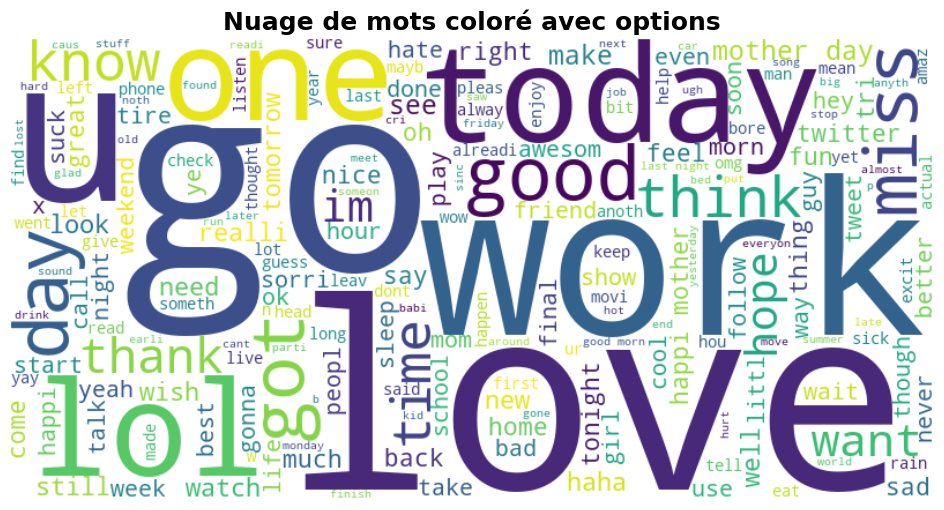

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Texte combiné
all_words = ' '.join(df['clean_text'])

# Générer le nuage de mots avec des couleurs aléatoires (colormap)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',  # palette de couleurs agréable
    max_words=200,
    contour_width=3,
    contour_color='steelblue'
).generate(all_words)

# Afficher
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots coloré avec options", fontsize=18, weight='bold')
plt.show()



## Étape 9 : Vectorisation et Encodage des Labels

Les modèles de machine learning ne peuvent pas traiter directement le texte brut. On doit donc le convertir en une représentation numérique. On a utilisé `CountVectorizer` de scikit-learn pour transformer nos textes nettoyés en une matrice de comptage de tokens (Bag-of-Words). On a limité le nombre de features (mots) aux 5000 plus fréquents pour contrôler la dimensionnalité.
Parallèlement, les labels de sentiment ('positive', 'negative', 'neutral') sont également textuels. On a utilisé `LabelEncoder` pour les convertir en valeurs numériques (0, 1, 2), ce qui est nécessaire pour l'entraînement du modèle. On a affiché les classes encodées.


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder


vectorizer = CountVectorizer(max_features=5000)

X = vectorizer.fit_transform(df['clean_text'])

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(df['sentiment'])

print(f" Classes encodées : {list(label_encoder.classes_)}")


 Classes encodées : ['negative', 'neutral', 'positive']


## Étape 10 : Séparation Entraînement/Test

Pour évaluer la performance de notre futur modèle sur des données qu'il n'a jamais vues, on a divisé notre jeu de données (les vecteurs `X` et les labels encodés `y`) en deux sous-ensembles : un ensemble d'entraînement (80% des données) et un ensemble de test (20% des données). On a utilisé la fonction `train_test_split` de scikit-learn, en fixant `random_state=42` pour assurer la reproductibilité des résultats.


In [26]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Étape 11 : Entraînement du Modèle

On a choisi un modèle Naive Bayes Multinomial (`MultinomialNB`), qui est souvent performant pour les tâches de classification de texte avec des features de type comptage (comme notre Bag-of-Words). On a initialisé le modèle, puis on l'a entraîné en utilisant l'ensemble d'entraînement (`X_train`, `y_train`) avec la méthode `fit()`.


In [27]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(X_train, y_train)


MultinomialNB()

## Étape 12 : Évaluation du Modèle

Après l'entraînement, on a évalué la performance du modèle sur l'ensemble de test (`X_test`), que le modèle n'avait jamais vu auparavant. On a d'abord fait des prédictions (`y_pred`) sur `X_test`. Ensuite, on a calculé et affiché plusieurs métriques d'évaluation :
- L'**Accuracy** : la proportion de prédictions correctes.
- Le **Rapport de Classification** : qui donne la précision, le rappel et le F1-score pour chaque classe (positive, negative, neutral).
- La **Matrice de Confusion** : qui montre le détail des prédictions correctes et incorrectes pour chaque classe (ex: combien de 'positive' ont été prédits comme 'negative').


In [28]:
from sklearn.metrics import accuracy_score


y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))


Accuracy : 0.6350072780203785


## Étape 13 : Test sur des Exemples Concrets

Pour tester le modèle de manière plus intuitive, on a défini une fonction `predict_sentiment`. Cette fonction prend une phrase en entrée, applique la même fonction de nettoyage `preprocess_text` que celle utilisée pour l'entraînement, vectorise le texte nettoyé avec le `vectorizer` déjà entraîné, utilise le `model` entraîné pour prédire le label numérique, et enfin utilise le `label_encoder` pour reconvertir le label numérique en texte ('positive', 'negative' ou 'neutral').
On a ensuite testé cette fonction sur quelques phrases exemples pour voir le sentiment prédit par notre modèle.


In [36]:
def predict_sentiment(text):
    clean = preprocess_text(text)
    vect = vectorizer.transform([clean])
    pred = model.predict(vect)
    return label_encoder.inverse_transform(pred)[0]

examples = [
    "I hate this product, it’s a complete disaster.",         # negative
    "This is fantastic, I highly recommend it!",              # positive
    "Not bad at all, but I expected better quality.",         # neutral
    "I absolutely love it, works perfectly every time!",      # positive
    "Terrible experience, I will never buy this again."       # negative
]

print("Testing the model on example sentences:")
for text in examples:
    sentiment = predict_sentiment(text)
    print(f'Text: "{text}" Predicted sentiment: {sentiment.capitalize()}')


Testing the model on example sentences:
Text: "I hate this product, it’s a complete disaster." Predicted sentiment: Negative
Text: "This is fantastic, I highly recommend it!" Predicted sentiment: Positive
Text: "Not bad at all, but I expected better quality." Predicted sentiment: Neutral
Text: "I absolutely love it, works perfectly every time!" Predicted sentiment: Positive
Text: "Terrible experience, I will never buy this again." Predicted sentiment: Negative
